In [1]:
#Importing Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping

df = pd.read_csv('creditcard.csv')

df.head()

Using TensorFlow backend.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
#Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df[df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [6]:
df[df['Class'] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [7]:
#Variance check before Featue scaling 
print(df.var())

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64


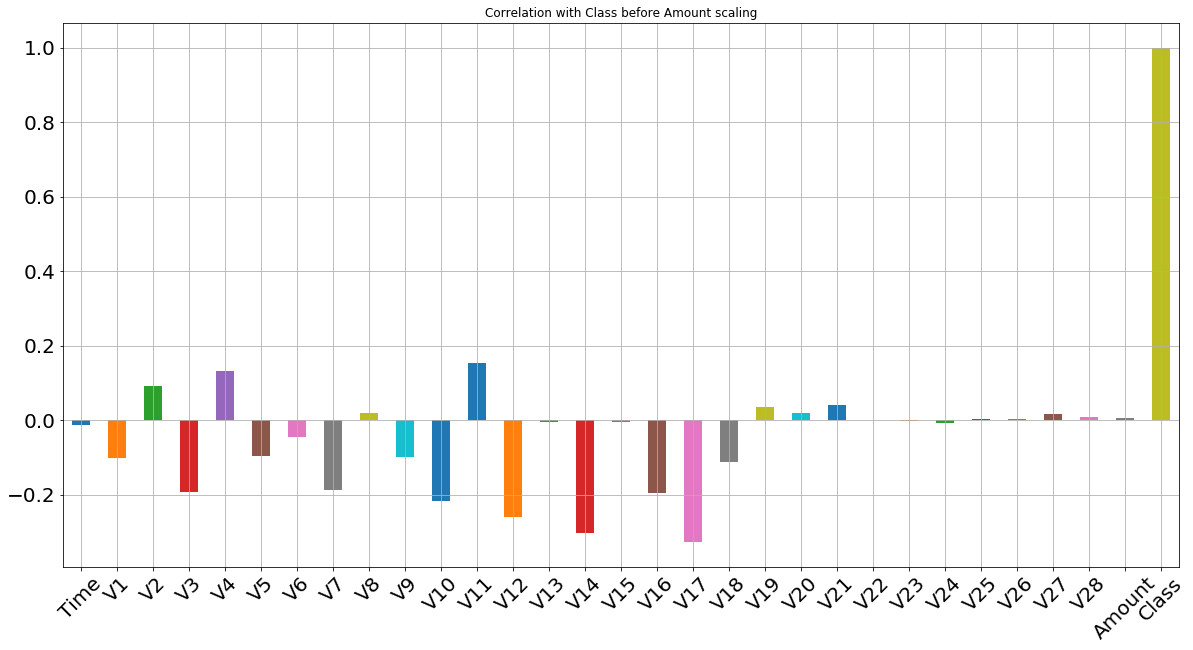

In [8]:
#Correlation check before Feature Scaling
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = 'Correlation with Class before Amount scaling', fontsize = 20,
        rot = 45, grid = True)

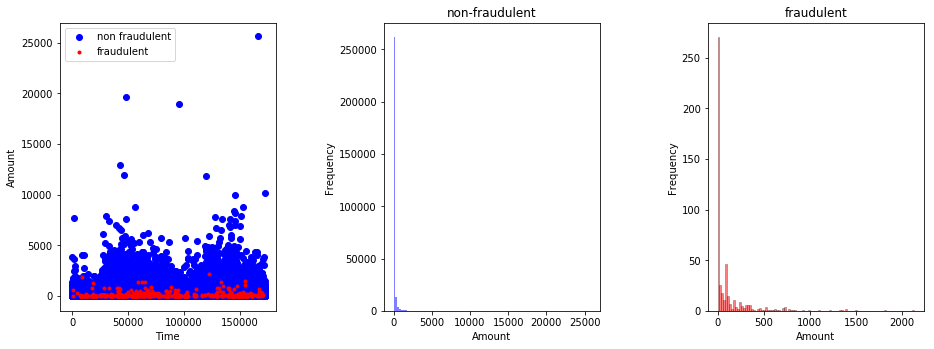

In [9]:
#Plot of fraudulent and non-fraudulent
fig, ax = plt.subplots(1, 3)
ax[0].scatter(df['Time'][df['Class'] == 0], df['Amount'][df['Class']==0], color='b' )
ax[0].scatter(df['Time'][df['Class'] == 1], df['Amount'][df['Class']==1], color='r' , marker='.')
ax[0].legend(['non fraudulent', 'fraudulent'], loc='best')
ax[1].hist( df['Amount'][df['Class']==0], 100, facecolor='b', alpha=0.5, label="Distribution of amounts for non-fraudulent ")
ax[2].hist( df['Amount'][df['Class']==1], 100, facecolor='r', ec="black", lw=0.5, alpha=0.5, label="Distribution of amounts for fraudulent")
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amount')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')
ax[2].set_xlabel('Amount')
ax[2].set_ylabel('Frequency')
ax[1].set_title('non-fraudulent')
ax[2].set_title('fraudulent')
fig.subplots_adjust(left=0, right=2, bottom=0, top=1, hspace=0.05, wspace=0.5)

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

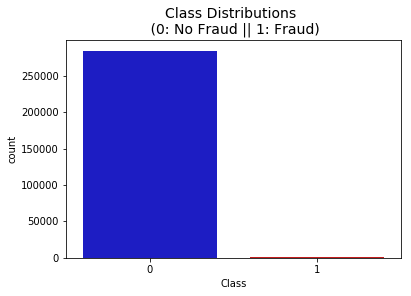

In [12]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

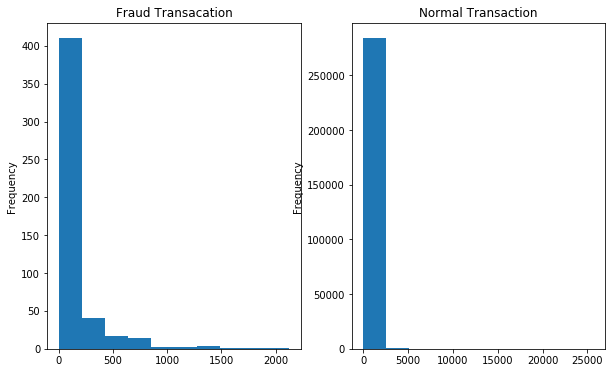

In [13]:
Fraud_transacation = df[df['Class']==1]
Normal_transacation= df[df['Class']==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

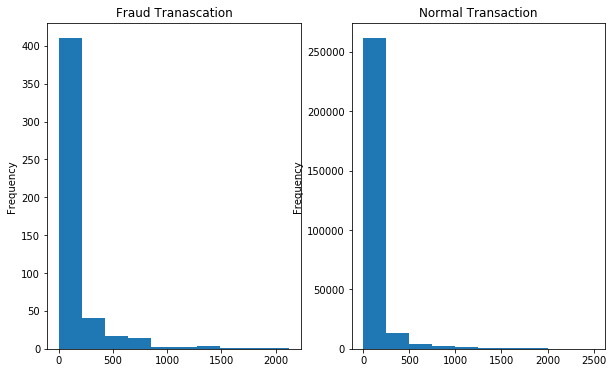

In [14]:
# the distribution for Normal transction is not clear and it seams that all transaction are less than 2.5 K
# So plot graph for same 
Fraud_transacation = df[df["Class"]==1]
Normal_transacation= df[df["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

In [15]:
#Amount scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


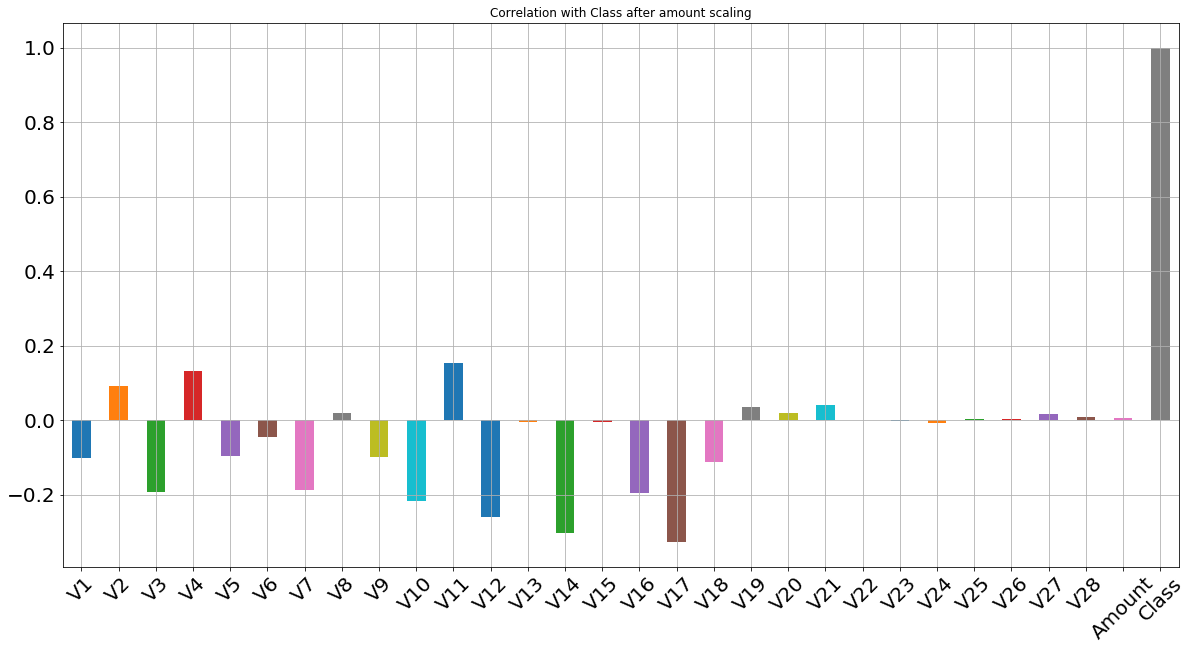

In [16]:
#Correlation check after feature scaling
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class after amount scaling", fontsize = 20,
        rot = 45, grid = True)

In [17]:
#Variance check after feature scaling
print(df.var())

V1        3.836489
V2        2.726820
V3        2.299029
V4        2.004684
V5        1.905081
V6        1.774946
V7        1.530401
V8        1.426479
V9        1.206992
V10       1.185594
V11       1.041855
V12       0.998403
V13       0.990571
V14       0.918906
V15       0.837803
V16       0.767819
V17       0.721373
V18       0.702539
V19       0.662662
V20       0.594325
V21       0.539526
V22       0.526643
V23       0.389951
V24       0.366808
V25       0.271731
V26       0.232543
V27       0.162919
V28       0.108955
Amount    1.000004
Class     0.001725
dtype: float64


In [18]:
X = df.loc[:, df.columns != 'Class' ]
Y = df.loc[:, df.columns == 'Class' ]

#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, 
                                                    stratify = Y)

X_train_train, X_test_test, Y_train_train, Y_test_test = train_test_split(X_train, Y_train, test_size = 0.20)

sm = SMOTE(random_state=42, kind = 'borderline1')

X_resampled, Y_resampled = sm.fit_resample(X_train_train, Y_train_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Code to determine layers, batch size, activation and epochs
# def create_model(layers, activation):
#     model = Sequential()
#     for i, nodes in enumerate(layers):
#         if i == 0:
#             model.add(Dense(nodes, input_dim = len(X.columns)))
#             model.add(Activation(activation))
#         else:
#             model.add(Dense(nodes))
#             model.add(Activation(activation))
#     model.add(Dense(1))
    
#     model.compile(optimizer = 'adam', loss='binary_crossentropy')
#     return(model)

# model = KerasClassifier(build_fn = create_model, verbose = 1)

# layers = [[29], [30], [35], [40], [45], [50], [60], [65], [70]]
# activations = [keras.activations.sigmoid, keras.activations.relu]
# param_grid = dict(layers = layers, activation = activations, batch_size = [256, 512], epochs = [30])
# grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring= 'f1')

In [20]:
# Code to determine neurons, dropout rate and kernel intializer
# def create_model(neurons=1, dropout_rate=0.0, init_mode='uniform'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(X.columns), kernel_initializer=init_mode, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    
#     model.compile(loss='binary_crossentropy', optimizer='adam')
#     return model
# model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=256, verbose=1)
# neurons = [29, 30, 35, 40, 45, 50, 55, 60, 65, 70]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(neurons = neurons, dropout_rate=dropout_rate, init_mode=init_mode)
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, scoring = make_scorer(f1_score))
# grid_result = grid.fit(X_resampled, Y_resampled)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [21]:
# Code to determine important features in the dataset
# def base_model():
#     model = Sequential()
#     model.add(Dense(64, input_dim=len(X.columns), activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
#     return model

# my_model = KerasClassifier(build_fn=base_model)    
# my_model.fit(X_resampled,Y_resampled)

# perm = PermutationImportance(my_model, random_state=42).fit(X_resampled,Y_resampled)
# eli5.show_weights(perm, feature_names = X.columns.tolist())

In [22]:
# Code to determine Learning Rate 
# model = Sequential()
# model.add(Dense(64, input_dim=len(X.columns), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# from keras_lr_finder import LRFinder
# lr_finder = LRFinder(model)
# lr_finder.find(X_resampled, Y_resampled, .00001, 1, 512, 5)

# lr_finder.plot_loss()
# plt.show()

In [23]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_control_accuracy = []
for i in range(0,60):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled, callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=512)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_control_accuracy.append(f1)
    
print(results_control_accuracy)

Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 5s 13us/step - loss: 0.1191 - acc: 0.9586 - val_loss: 0.0278 - val_acc: 0.9918
Epoch 2/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0279 - acc: 0.9925 - val_loss: 0.0179 - val_acc: 0.9947
Epoch 3/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0190 - acc: 0.9952 - val_loss: 0.0147 - val_acc: 0.9961
Epoch 4/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0147 - acc: 0.9967 - val_loss: 0.0131 - val_acc: 0.9968
Epoch 5/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0119 - acc: 0.9975 - val_loss: 0.0111 - val_acc: 0.9974
Epoch 6/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0105 - acc: 0.9979 - val_loss: 0.0105 - val_acc: 0.9979
Epoch 7/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0093 - acc: 0.9983 - val_loss: 0

363930/363930 [==============================] - 4s 10us/step - loss: 0.0085 - acc: 0.9985 - val_loss: 0.0102 - val_acc: 0.9983
Epoch 9/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0072 - acc: 0.9988 - val_loss: 0.0087 - val_acc: 0.9987
Epoch 10/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0070 - acc: 0.9989 - val_loss: 0.0089 - val_acc: 0.9987
Epoch 11/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0060 - acc: 0.9991 - val_loss: 0.0087 - val_acc: 0.9987
Epoch 12/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0059 - acc: 0.9992 - val_loss: 0.0083 - val_acc: 0.9989
Epoch 13/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0055 - acc: 0.9992 - val_loss: 0.0085 - val_acc: 0.9988
Epoch 14/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0050 - acc: 0.9993 - val_loss: 0.0084 - val_acc: 0.9989
Train on 363930 samples, validate

363930/363930 [==============================] - 4s 11us/step - loss: 0.0058 - acc: 0.9991 - val_loss: 0.0090 - val_acc: 0.9987
Epoch 13/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0058 - acc: 0.9991 - val_loss: 0.0085 - val_acc: 0.9988
Epoch 14/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0053 - acc: 0.9992 - val_loss: 0.0089 - val_acc: 0.9988
Epoch 15/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0.0090 - val_acc: 0.9988
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 6s 15us/step - loss: 0.1381 - acc: 0.9534 - val_loss: 0.0316 - val_acc: 0.9908
Epoch 2/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0295 - acc: 0.9925 - val_loss: 0.0196 - val_acc: 0.9943
Epoch 3/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0197 - acc: 0.9953 - val_loss: 0.0163 - 

Epoch 6/30
363930/363930 [==============================] - 4s 10us/step - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 7/30
363930/363930 [==============================] - 5s 13us/step - loss: 0.0093 - acc: 0.9983 - val_loss: 0.0106 - val_acc: 0.9979
Epoch 8/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0084 - acc: 0.9985 - val_loss: 0.0092 - val_acc: 0.9985
Epoch 9/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0077 - acc: 0.9987 - val_loss: 0.0091 - val_acc: 0.9986
Epoch 10/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0071 - acc: 0.9988 - val_loss: 0.0092 - val_acc: 0.9987
Epoch 11/30
363930/363930 [==============================] - 5s 12us/step - loss: 0.0064 - acc: 0.9990 - val_loss: 0.0092 - val_acc: 0.9987
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 6s 17us/step - loss: 0.1531 - acc: 0.9467 - val_loss:

363930/363930 [==============================] - 4s 12us/step - loss: 0.0051 - acc: 0.9993 - val_loss: 0.0088 - val_acc: 0.9988
Epoch 16/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0.0087 - val_acc: 0.9988
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 6s 17us/step - loss: 0.1861 - acc: 0.9266 - val_loss: 0.0329 - val_acc: 0.9910
Epoch 2/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0321 - acc: 0.9915 - val_loss: 0.0199 - val_acc: 0.9935
Epoch 3/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0215 - acc: 0.9947 - val_loss: 0.0158 - val_acc: 0.9955
Epoch 4/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0163 - acc: 0.9962 - val_loss: 0.0132 - val_acc: 0.9967
Epoch 5/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0132 - acc: 0.9971 - val_loss: 0.0128 - va

363930/363930 [==============================] - 6s 18us/step - loss: 0.1742 - acc: 0.9370 - val_loss: 0.0390 - val_acc: 0.9881
Epoch 2/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0353 - acc: 0.9899 - val_loss: 0.0227 - val_acc: 0.9932
Epoch 3/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0218 - acc: 0.9944 - val_loss: 0.0173 - val_acc: 0.9947
Epoch 4/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0164 - acc: 0.9962 - val_loss: 0.0144 - val_acc: 0.9962
Epoch 5/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0137 - acc: 0.9971 - val_loss: 0.0132 - val_acc: 0.9967
Epoch 6/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0115 - acc: 0.9977 - val_loss: 0.0117 - val_acc: 0.9975
Epoch 7/30
363930/363930 [==============================] - 4s 11us/step - loss: 0.0100 - acc: 0.9981 - val_loss: 0.0108 - val_acc: 0.9978
Epoch 8/30
363930/363930 [============

Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 8s 22us/step - loss: 0.1527 - acc: 0.9468 - val_loss: 0.0322 - val_acc: 0.9906
Epoch 2/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0309 - acc: 0.9918 - val_loss: 0.0193 - val_acc: 0.9948
Epoch 3/30
363930/363930 [==============================] - 5s 13us/step - loss: 0.0206 - acc: 0.9951 - val_loss: 0.0149 - val_acc: 0.9960
Epoch 4/30
363930/363930 [==============================] - 5s 13us/step - loss: 0.0162 - acc: 0.9964 - val_loss: 0.0130 - val_acc: 0.9968
Epoch 5/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0133 - acc: 0.9972 - val_loss: 0.0118 - val_acc: 0.9972
Epoch 6/30
363930/363930 [==============================] - 5s 13us/step - loss: 0.0115 - acc: 0.9977 - val_loss: 0.0113 - val_acc: 0.9973
Epoch 7/30
363930/363930 [==============================] - 5s 13us/step - loss: 0.0096 - acc: 0.9983 - val_loss: 0

363930/363930 [==============================] - 5s 12us/step - loss: 0.0134 - acc: 0.9971 - val_loss: 0.0124 - val_acc: 0.9971
Epoch 6/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0115 - acc: 0.9978 - val_loss: 0.0114 - val_acc: 0.9975
Epoch 7/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0099 - acc: 0.9982 - val_loss: 0.0104 - val_acc: 0.9978
Epoch 8/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0087 - acc: 0.9984 - val_loss: 0.0097 - val_acc: 0.9982
Epoch 9/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0075 - acc: 0.9987 - val_loss: 0.0094 - val_acc: 0.9985
Epoch 10/30
363930/363930 [==============================] - 4s 12us/step - loss: 0.0070 - acc: 0.9988 - val_loss: 0.0094 - val_acc: 0.9985
Epoch 11/30
363930/363930 [==============================] - 5s 12us/step - loss: 0.0065 - acc: 0.9990 - val_loss: 0.0091 - val_acc: 0.9985
Epoch 12/30
363930/363930 [=========

Epoch 11/30
363930/363930 [==============================] - 5s 15us/step - loss: 0.0065 - acc: 0.9990 - val_loss: 0.0090 - val_acc: 0.9988
Epoch 12/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0058 - acc: 0.9992 - val_loss: 0.0088 - val_acc: 0.9988
Epoch 13/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0055 - acc: 0.9992 - val_loss: 0.0089 - val_acc: 0.9989
Epoch 14/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0051 - acc: 0.9993 - val_loss: 0.0087 - val_acc: 0.9989
Epoch 15/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0.0087 - val_acc: 0.9990
Epoch 16/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0047 - acc: 0.9994 - val_loss: 0.0085 - val_acc: 0.9990
Epoch 17/30
363930/363930 [==============================] - 5s 14us/step - loss: 0.0044 - acc: 0.9994 - val_loss: 0.0086 - val_acc: 0.9990
Epoch 18/30
363930/3

In [24]:
results_control_accuracy = pd.DataFrame(results_control_accuracy)

In [25]:
mean_control_accuracy = results_control_accuracy.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

Mean Control Accuracy: 0    0.754945
dtype: float64


In [26]:
std_control_accuracy = results_control_accuracy.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))

Standard Deviation of Control Accuracy Results: 0    0.030112
dtype: float64


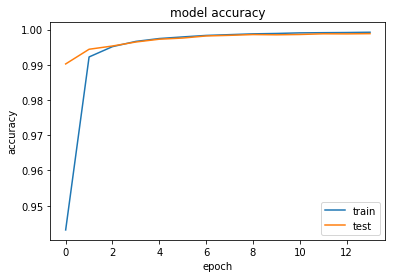

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

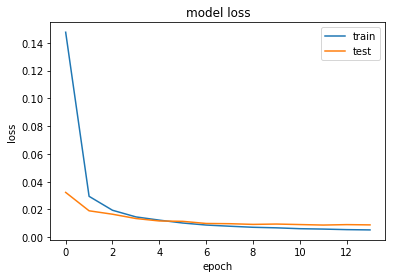

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[56821    43]
 [   13    85]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.87      0.75        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.83      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [33]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1]))

Train Accuracy: 0.9992333690544885
Test Accuracy:0.9988369286137506


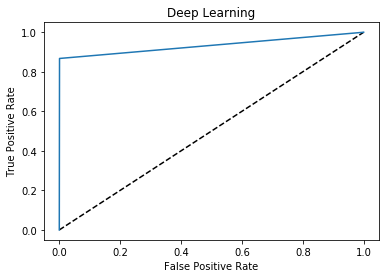

In [34]:
#Roc curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [35]:
# Code to determine learning rate 
# model = Sequential()
# model.add(Dense(64, input_dim=len(X.columns), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# from keras_lr_finder import LRFinder
# lr_finder = LRFinder(model)
# lr_finder.find(X_resampled, Y_resampled, .00001, 1, 512, 5)

# lr_finder.plot_loss()
# plt.show()

In [36]:
from sklearn.metrics import f1_score
callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]
results_experimental_accuracy = []
for i in range(0,60):
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns),kernel_initializer = 'he_normal',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.001),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_resampled, Y_resampled,callbacks = callbacks,
          epochs=30,validation_data = (X_test_test, Y_test_test),
          batch_size=512)

    y_test_pred= model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_experimental_accuracy.append(f1)
    
print(results_experimental_accuracy)

Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 11s 30us/step - loss: 0.1760 - acc: 0.9438 - val_loss: 0.0297 - val_acc: 0.9915
Epoch 2/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0292 - acc: 0.9920 - val_loss: 0.0174 - val_acc: 0.9956
Epoch 3/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0175 - acc: 0.9959 - val_loss: 0.0141 - val_acc: 0.9971
Epoch 4/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0124 - acc: 0.9975 - val_loss: 0.0115 - val_acc: 0.9983
Epoch 5/30
363930/363930 [==============================] - 6s 18us/step - loss: 0.0095 - acc: 0.9984 - val_loss: 0.0101 - val_acc: 0.9986
Epoch 6/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0081 - acc: 0.9988 - val_loss: 0.0097 - val_acc: 0.9988
Epoch 7/30
363930/363930 [==============================] - 9s 25us/step - loss: 0.0070 - acc: 0.9990 - val_loss: 

Epoch 16/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0045 - acc: 0.9995 - val_loss: 0.0087 - val_acc: 0.9993
Epoch 17/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0043 - acc: 0.9995 - val_loss: 0.0088 - val_acc: 0.9993
Epoch 18/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0039 - acc: 0.9996 - val_loss: 0.0089 - val_acc: 0.9993
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 11s 32us/step - loss: 0.1479 - acc: 0.9548 - val_loss: 0.0219 - val_acc: 0.9940
Epoch 2/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0246 - acc: 0.9933 - val_loss: 0.0138 - val_acc: 0.9970
Epoch 3/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0149 - acc: 0.9968 - val_loss: 0.0119 - val_acc: 0.9980
Epoch 4/30
363930/363930 [==============================] - 6s 18us/step - loss: 0.0105 - acc: 0.9981 - val_los

363930/363930 [==============================] - 7s 18us/step - loss: 0.0240 - acc: 0.9939 - val_loss: 0.0135 - val_acc: 0.9974
Epoch 3/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0145 - acc: 0.9969 - val_loss: 0.0111 - val_acc: 0.9983
Epoch 4/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0096 - val_acc: 0.9987
Epoch 5/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0085 - acc: 0.9986 - val_loss: 0.0092 - val_acc: 0.9988
Epoch 6/30
363930/363930 [==============================] - 6s 18us/step - loss: 0.0076 - acc: 0.9989 - val_loss: 0.0086 - val_acc: 0.9991
Epoch 7/30
363930/363930 [==============================] - 6s 18us/step - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0088 - val_acc: 0.9990
Epoch 8/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0058 - acc: 0.9992 - val_loss: 0.0087 - val_acc: 0.9992
Train on 363930 samples, validate on 4

363930/363930 [==============================] - 7s 19us/step - loss: 0.0271 - acc: 0.9924 - val_loss: 0.0148 - val_acc: 0.9963
Epoch 3/30
363930/363930 [==============================] - 8s 22us/step - loss: 0.0166 - acc: 0.9962 - val_loss: 0.0116 - val_acc: 0.9980
Epoch 4/30
363930/363930 [==============================] - 8s 21us/step - loss: 0.0118 - acc: 0.9978 - val_loss: 0.0119 - val_acc: 0.9983
Epoch 5/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0092 - acc: 0.9984 - val_loss: 0.0102 - val_acc: 0.9986
Epoch 6/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0080 - acc: 0.9988 - val_loss: 0.0098 - val_acc: 0.9986
Epoch 7/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0068 - acc: 0.9990 - val_loss: 0.0091 - val_acc: 0.9990
Epoch 8/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0063 - acc: 0.9992 - val_loss: 0.0089 - val_acc: 0.9991
Epoch 9/30
363930/363930 [============

Epoch 12/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0046 - acc: 0.9995 - val_loss: 0.0085 - val_acc: 0.9992
Epoch 13/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0044 - acc: 0.9995 - val_loss: 0.0084 - val_acc: 0.9994
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 12s 33us/step - loss: 0.1316 - acc: 0.9540 - val_loss: 0.0238 - val_acc: 0.9925
Epoch 2/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0244 - acc: 0.9935 - val_loss: 0.0134 - val_acc: 0.9970
Epoch 3/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0149 - acc: 0.9968 - val_loss: 0.0115 - val_acc: 0.9979
Epoch 4/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0110 - acc: 0.9980 - val_loss: 0.0102 - val_acc: 0.9985
Epoch 5/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0084 - acc: 0.9987 - val_loss

Epoch 14/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.0081 - val_acc: 0.9993
Epoch 15/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0039 - acc: 0.9996 - val_loss: 0.0081 - val_acc: 0.9994
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 12s 34us/step - loss: 0.1806 - acc: 0.9436 - val_loss: 0.0268 - val_acc: 0.9916
Epoch 2/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0304 - acc: 0.9914 - val_loss: 0.0169 - val_acc: 0.9959
Epoch 3/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0173 - acc: 0.9960 - val_loss: 0.0125 - val_acc: 0.9977
Epoch 4/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0126 - acc: 0.9975 - val_loss: 0.0113 - val_acc: 0.9983
Epoch 5/30
363930/363930 [==============================] - 7s 18us/step - loss: 0.0100 - acc: 0.9983 - val_loss

Epoch 8/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0052 - acc: 0.9994 - val_loss: 0.0089 - val_acc: 0.9991
Epoch 9/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0052 - acc: 0.9994 - val_loss: 0.0086 - val_acc: 0.9991
Epoch 10/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0048 - acc: 0.9994 - val_loss: 0.0089 - val_acc: 0.9992
Epoch 11/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0046 - acc: 0.9994 - val_loss: 0.0085 - val_acc: 0.9993
Epoch 12/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0043 - acc: 0.9995 - val_loss: 0.0087 - val_acc: 0.9992
Epoch 13/30
363930/363930 [==============================] - 7s 19us/step - loss: 0.0043 - acc: 0.9996 - val_loss: 0.0086 - val_acc: 0.9992
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 13s 36us/step - loss: 0.1342 - acc: 0.9548 - val_lo

363930/363930 [==============================] - 14s 39us/step - loss: 0.1429 - acc: 0.9500 - val_loss: 0.0280 - val_acc: 0.9908
Epoch 2/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0273 - acc: 0.9924 - val_loss: 0.0154 - val_acc: 0.9965
Epoch 3/30
363930/363930 [==============================] - 8s 21us/step - loss: 0.0163 - acc: 0.9962 - val_loss: 0.0118 - val_acc: 0.9980
Epoch 4/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0108 - acc: 0.9979 - val_loss: 0.0104 - val_acc: 0.9986
Epoch 5/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0088 - acc: 0.9986 - val_loss: 0.0099 - val_acc: 0.9988
Epoch 6/30
363930/363930 [==============================] - 7s 21us/step - loss: 0.0068 - acc: 0.9990 - val_loss: 0.0096 - val_acc: 0.9989
Epoch 7/30
363930/363930 [==============================] - 8s 21us/step - loss: 0.0061 - acc: 0.9992 - val_loss: 0.0094 - val_acc: 0.9989
Epoch 8/30
363930/363930 [===========

Epoch 9/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0054 - acc: 0.9993 - val_loss: 0.0091 - val_acc: 0.9990
Epoch 10/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0051 - acc: 0.9994 - val_loss: 0.0088 - val_acc: 0.9990
Epoch 11/30
363930/363930 [==============================] - 7s 20us/step - loss: 0.0051 - acc: 0.9994 - val_loss: 0.0084 - val_acc: 0.9992
Epoch 12/30
363930/363930 [==============================] - 8s 22us/step - loss: 0.0049 - acc: 0.9994 - val_loss: 0.0085 - val_acc: 0.9992
Epoch 13/30
363930/363930 [==============================] - 9s 25us/step - loss: 0.0045 - acc: 0.9995 - val_loss: 0.0085 - val_acc: 0.9992
Train on 363930 samples, validate on 45569 samples
Epoch 1/30
363930/363930 [==============================] - 18s 48us/step - loss: 0.1461 - acc: 0.9505 - val_loss: 0.0210 - val_acc: 0.9937
Epoch 2/30
363930/363930 [==============================] - 9s 25us/step - loss: 0.0247 - acc: 0.9937 - val_lo

In [37]:
results_experimental_accuracy = pd.DataFrame(results_experimental_accuracy)

In [38]:
mean_experimental_accuracy = results_experimental_accuracy.mean()
print("Mean Experimental Accuracy: {}".format(mean_experimental_accuracy))

Mean Experimental Accuracy: 0    0.791146
dtype: float64


In [39]:
std_experimental_accuracy = results_experimental_accuracy.std()
print("Standard Deviation of Experimental Accuracy Results: {}".format(std_experimental_accuracy))

Standard Deviation of Experimental Accuracy Results: 0    0.018764
dtype: float64


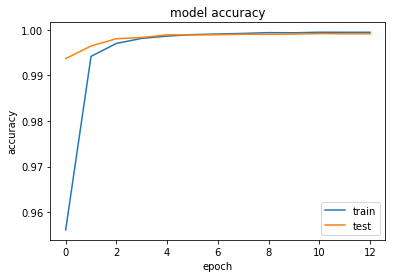

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

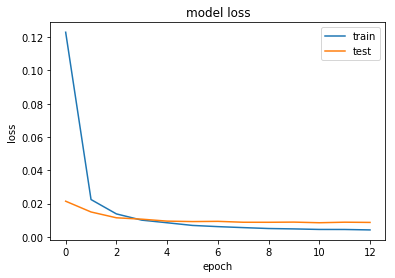

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [42]:
#Confusion Matrix generation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[56840    24]
 [   17    81]]


In [43]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.83      0.80        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [44]:
print('Train Accuracy: {}\nTest Accuracy:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1]))

Train Accuracy: 0.9994834171406589
Test Accuracy:0.9991441550176655


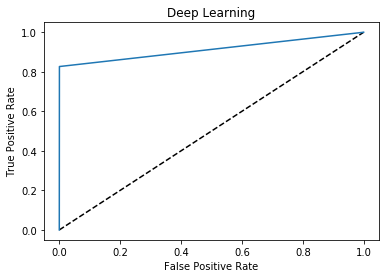

In [45]:
#Roc Curve generation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Deep Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Learning')
plt.show()

In [46]:
results_accuracy= pd.concat([results_control_accuracy, results_experimental_accuracy], axis=1)
results_accuracy.columns = ['Control', 'Experimental']

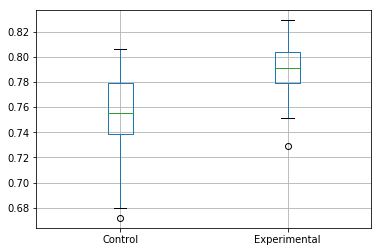

In [47]:
results_accuracy.boxplot()

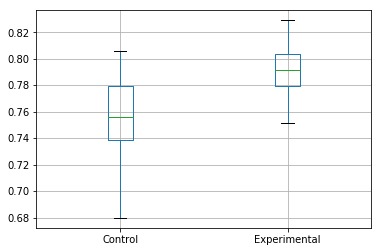

In [48]:
results_accuracy.boxplot(showfliers=False)

(0.9, 1)

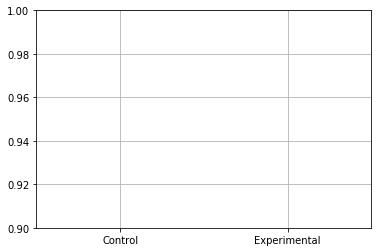

In [49]:
ax = results_accuracy.boxplot()
ax.set_ylim([0.9,1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a761715f8>,
      dtype=object)

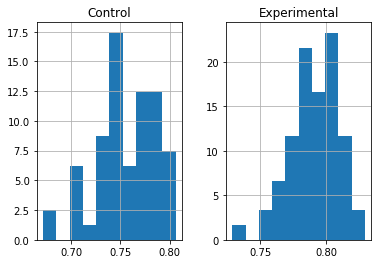

In [50]:
results_accuracy.hist(density=True)

In [51]:
#Normality Testing
from scipy import stats

alpha = 0.05;

s, p = stats.normaltest(results_control_accuracy)
if p < alpha:
  print('Control data is not normal')
else:
  print('Control data is normal')

s, p = stats.normaltest(results_experimental_accuracy)
if p < alpha:
  print('Experimental data is not normal')
else:
  print('Experimental data is normal')

Control data is normal
Experimental data is not normal


In [52]:
#Significance Testing
s, p = stats.wilcoxon(results_control_accuracy[0], results_experimental_accuracy[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis rejected, significant difference between the data-sets
